<br>

# <center> K Nearest Neighbors - *Multi Class*


<br>

---

<br>


<br>

## Import Libraries

In [1]:
# importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<br>

## Dataset Overview

In [2]:
# loading dataset
from sklearn.datasets import load_iris
iris = load_iris()

# Creating dataframe
df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])

# extracting targets
target = iris['target']

# extracting targets names
targetNames = iris['target_names']

In [3]:
# dataset overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# checking the target class and their names
print('Target Classes')
print('--------------------')

for index, name in enumerate(targetNames):
  print(f'Class {index} : {name}')

Target Classes
--------------------
Class 0 : setosa
Class 1 : versicolor
Class 2 : virginica


<br>

## Preprocessing

**Train Test Split**

In [6]:
# Train Test Split
X = df.values
y = target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

**Scaling Data**

In [7]:
# Scaling Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


<br>

# 01. Model Design

In [8]:
# importing libraries for model design
from sklearn.neighbors import KNeighborsClassifier

In [9]:
# checking the shape of the training data
X_train.shape

(127, 4)

## Creating Model

In [10]:
# model creatiion
model = KNeighborsClassifier(n_neighbors=8)

<br>

# 02. Model Training

In [11]:
# model training
model.fit(
    X = X_train,
    y = y_train
)


KNeighborsClassifier(n_neighbors=8)

<br>

# 03. Model Evaluaiton

<br>

## a. Confusion Matrix

In [12]:
# prediction on test set
predictions = model.predict(X_test)

In [13]:
# calculationg confusion matrix
from sklearn.metrics import confusion_matrix
confusionMat = confusion_matrix(y_test, predictions)

Text(56.760000000000005, 0.5, 'Actual Class')

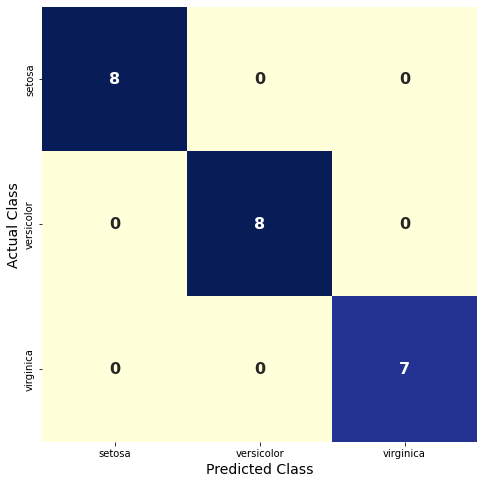

In [14]:
# plotting heatmap of confusion matrix
plt.figure(figsize=(8,8))

sns.heatmap(confusionMat, square=True, fmt='d', 
            cbar=False, cmap='YlGnBu',  
            xticklabels=targetNames,
            yticklabels=targetNames,
            annot=True,
            annot_kws={
                "fontsize":16,
                'fontweight': 'bold',
                },
          )

plt.xlabel('Predicted Class', fontsize=14)
plt.ylabel('Actual Class', fontsize=14)

<br>

## b. Prediction on New Data

**Creating data**

In [15]:
# defining data position
pos = 95

# collecting data from dataframe - df
new_data = df.iloc[pos]

# reshaping the data
new_data = new_data.values.reshape(-1, 4)

# scaling the data using scaler()
new_data = scaler.transform( new_data )

# extracting true result
true_class = target[pos]

<br>

**Predicting Class for Created Data**

In [16]:
# predicting result for new_data
predicted_class = model.predict(new_data)

# extracting the predicted class
predicted_class = predicted_class[0]

<br>

**Extracting Class name**

In [17]:
# extracting predicted class name
predicted_class_name = targetNames[predicted_class]
print(f"\n The predicted class is : '{predicted_class_name}'")

# extracting actual class name
true_class_name = targetNames[true_class]
print(f"\n The actual class is : '{true_class_name}'")


 The predicted class is : 'versicolor'

 The actual class is : 'versicolor'


<br>
<br>

---

<br>

# Save the model


```
# defining the name of the model
modelName = 'model.h5'

# creating the path
path = 'model_directory/' + modelName

# save model
model.save( path )
```



<br>

# Load the model


```
# defining the name of the model
modelName = 'model.h5'

# creating the path
path = 'model_directory/' + modelName

# loading saved models
from tensorflow.keras.models import load_model
model = load_model( path )
```

